In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from factor_analyzer import FactorAnalyzer
from sklearn.datasets import load_wine

In [ ]:
# https://qiita.com/roki18d/items/b76b8d153111814d84d4

In [5]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
print(X)

     alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
0      14.23        1.71  2.43  ...  1.04                          3.92   1065.0
1      13.20        1.78  2.14  ...  1.05                          3.40   1050.0
2      13.16        2.36  2.67  ...  1.03                          3.17   1185.0
3      14.37        1.95  2.50  ...  0.86                          3.45   1480.0
4      13.24        2.59  2.87  ...  1.04                          2.93    735.0
..       ...         ...   ...  ...   ...                           ...      ...
173    13.71        5.65  2.45  ...  0.64                          1.74    740.0
174    13.40        3.91  2.48  ...  0.70                          1.56    750.0
175    13.27        4.28  2.26  ...  0.59                          1.56    835.0
176    13.17        2.59  2.37  ...  0.60                          1.62    840.0
177    14.13        4.10  2.74  ...  0.61                          1.60    560.0

[178 rows x 13 columns]


In [6]:
X_stats = X.describe().transpose()

def norm(x):
    return (x-X_stats['mean'])/X_stats['std']

X = norm(X)

In [7]:
fa = FactorAnalyzer(n_factors=3, rotation=None)
fa.fit(X)

FactorAnalyzer(rotation=None, rotation_kwargs={})

In [8]:
fa.loadings_

array([[ 3.03695933e-01,  7.18459283e-01, -1.84135254e-01],
       [-4.69444771e-01,  2.78685460e-01,  8.61921142e-02],
       [-8.96587187e-04,  4.49071088e-01,  6.51789625e-01],
       [-5.10072133e-01, -2.83591090e-02,  6.99150865e-01],
       [ 2.63599881e-01,  3.49076634e-01,  9.10060421e-02],
       [ 8.45207512e-01,  9.47272289e-02,  1.66562980e-01],
       [ 9.38545125e-01, -1.21792372e-02,  1.90407577e-01],
       [-5.80889756e-01,  4.43611004e-02,  1.38685526e-01],
       [ 6.18386558e-01,  4.26912977e-02,  1.22035993e-01],
       [-1.85667896e-01,  8.09678096e-01, -1.08117369e-01],
       [ 5.98261734e-01, -3.88603477e-01,  5.02801028e-02],
       [ 8.03486818e-01, -2.62017975e-01,  1.74507348e-01],
       [ 6.02834447e-01,  5.48470219e-01, -1.24683648e-01]])

<AxesSubplot: xlabel='factor1', ylabel='factor2'>

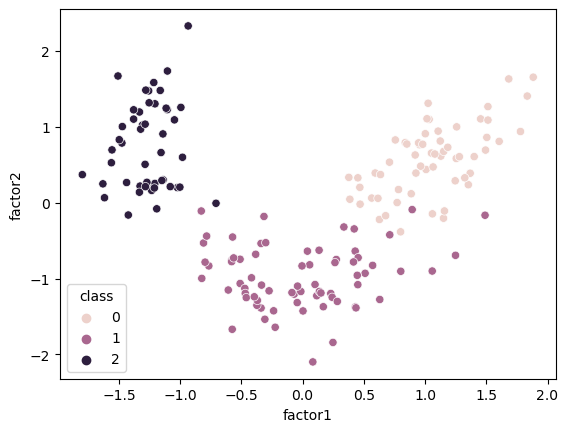

In [9]:
result_df = pd.DataFrame(fa.transform(X), columns=['factor1', 'factor2', 'factor3'])
result_df['class'] = wine.target

sns.scatterplot(x='factor1', y='factor2', hue='class', data=result_df)

In [10]:
loadings_df = pd.DataFrame(fa.loadings_, columns=['factor1', 'factor2', 'factor3'])
loadings_df.index = wine.feature_names

loadings_df

,factor1,factor2,factor3
alcohol,0.303696,0.718459,-0.184135
malic_acid,-0.469445,0.278685,0.086192
ash,-0.000897,0.449071,0.651790
alcalinity_of_ash,-0.510072,-0.028359,0.699151
magnesium,0.263600,0.349077,0.091006
total_phenols,0.845208,0.094727,0.166563
flavanoids,0.938545,-0.012179,0.190408
nonflavanoid_phenols,-0.580890,0.044361,0.138686
proanthocyanins,0.618387,0.042691,0.122036
color_intensity,-0.185668,0.809678,-0.108117


In [11]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

svc = SVC(C=1.0)
y = wine.target

# 5分割交差検証
kf = KFold(n_splits=5, random_state=0, shuffle=True)

# 予測結果格納用NumPy配列
y_pred = np.zeros((len(X),), dtype=float)

for train_idx, valid_idx in kf.split(X):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y[train_idx], y[valid_idx]


    
    svc.fit(X_train, y_train)
    y_pred[valid_idx] = svc.predict(X_valid)

In [12]:
acc = accuracy_score(y, y_pred)
# 0.9831460674157303

cnf = confusion_matrix(y, y_pred)
# [[58  1  0]
#  [ 0 70  1]
#  [ 0  1 47]]

In [ ]:
# https://qiita.com/y_itoh/items/227cb33317ceb09199c2

In [13]:
# 数値計算ライブラリ
import numpy as np
import pandas as pd
# 可視化ライブラリ
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
url = 'https://raw.githubusercontent.com/yumi-ito/sample_data/master/subject_scores.csv'
df = pd.read_csv(url)
df.head()

,国語,英語,数学,物理,化学,生物,地学,世界史,日本史,経済,地理,倫理
0,49,49,54,54,60,48,56,56,62,52,55,41
1,57,60,48,51,64,60,61,64,67,55,58,54
2,65,68,50,51,54,44,55,59,66,53,61,52
3,55,57,49,51,61,55,58,61,66,53,57,50
4,43,41,45,46,46,33,45,45,56,43,45,31


In [15]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,国語,英語,数学,物理,化学,生物,地学,世界史,日本史,経済,地理,倫理
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
mean,57.578,59.628,52.577,53.584,60.6,51.601,58.561,60.63,65.574,54.576,59.64,49.588
std,8.32293,10.0724,6.19245,5.26466,8.36612,10.6771,7.03703,7.45726,4.31545,5.79584,6.77512,9.0544
min,30,26,33,36,34,16,36,37,52,35,37,23
25%,52,53,48.75,50,55,44,54,56,63,51,55,44
50%,58,60,52,54,61,52,59,61,66,55,60,49
75%,63,66,57,57,66,59,63,66,69,59,64,56
max,86,95,72,69,82,82,77,85,81,71,79,84


array([[<AxesSubplot: xlabel='国語', ylabel='国語'>,
        <AxesSubplot: xlabel='英語', ylabel='国語'>,
        <AxesSubplot: xlabel='数学', ylabel='国語'>,
        <AxesSubplot: xlabel='物理', ylabel='国語'>,
        <AxesSubplot: xlabel='化学', ylabel='国語'>,
        <AxesSubplot: xlabel='生物', ylabel='国語'>,
        <AxesSubplot: xlabel='地学', ylabel='国語'>,
        <AxesSubplot: xlabel='世界史', ylabel='国語'>,
        <AxesSubplot: xlabel='日本史', ylabel='国語'>,
        <AxesSubplot: xlabel='経済', ylabel='国語'>,
        <AxesSubplot: xlabel='地理', ylabel='国語'>,
        <AxesSubplot: xlabel='倫理', ylabel='国語'>],
       [<AxesSubplot: xlabel='国語', ylabel='英語'>,
        <AxesSubplot: xlabel='英語', ylabel='英語'>,
        <AxesSubplot: xlabel='数学', ylabel='英語'>,
        <AxesSubplot: xlabel='物理', ylabel='英語'>,
        <AxesSubplot: xlabel='化学', ylabel='英語'>,
        <AxesSubplot: xlabel='生物', ylabel='英語'>,
        <AxesSubplot: xlabel='地学', ylabel='英語'>,
        <AxesSubplot: xlabel='世界史', ylabel='英語'>,
        <AxesSub

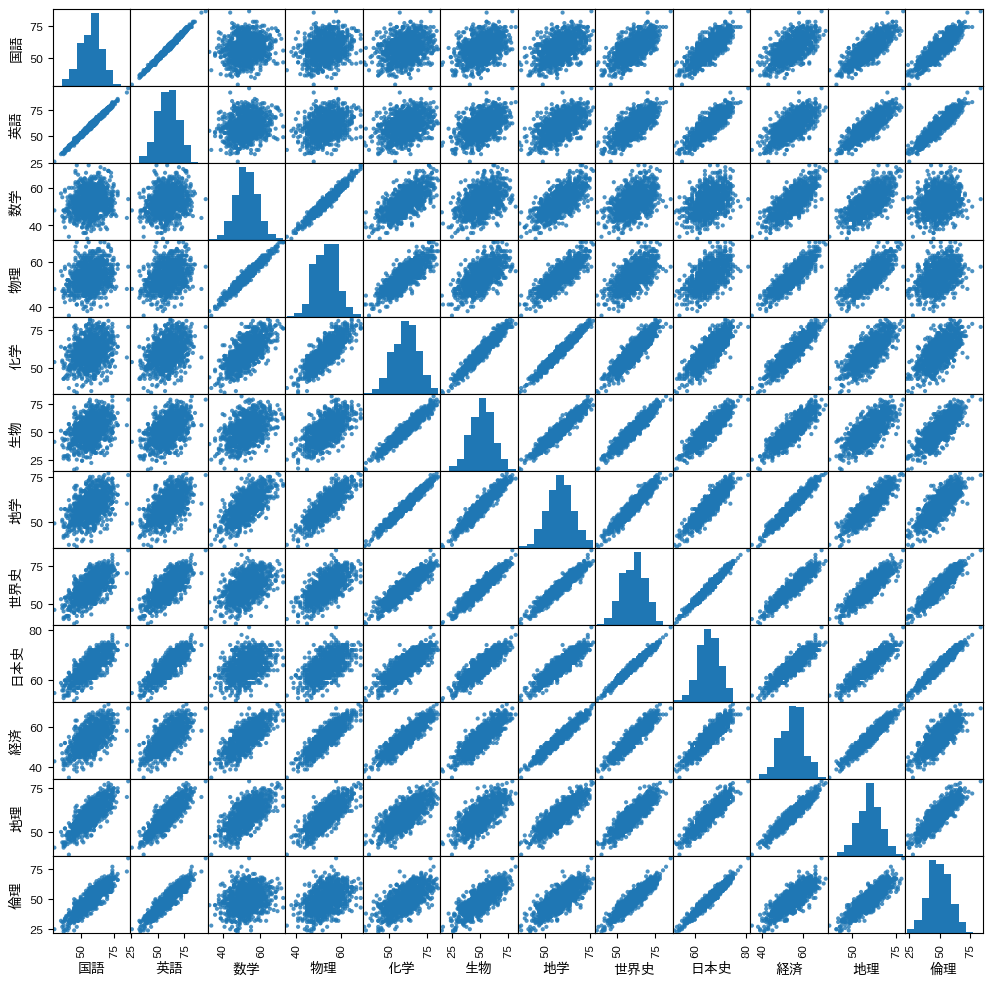

In [17]:
# matplotlibを日本語表示に対応させるモジュール
# !pip install japanize-matplotlib
import japanize_matplotlib

# pandasのplottingメソッドをインポート
from pandas import plotting

# 散布図行列を表示
plotting.scatter_matrix(df, figsize=(12, 12), alpha=0.8)

In [18]:
# sklearnの標準化モジュールをインポート
from sklearn.preprocessing import StandardScaler

# データを変換する計算式を生成
sc = StandardScaler()
sc.fit(df)

# 実際にデータを変換
z = sc.transform(df)

print(z)
print(z.shape)

[[-1.0311622  -1.05568951  0.229911   ... -0.44467875 -0.68520102
  -0.94896328]
 [-0.06948143  0.03695112 -0.7394959  ...  0.07319246 -0.24218312
   0.48752049]
 [ 0.89219933  0.83159885 -0.41636027 ... -0.27205501  0.20083478
   0.26652299]
 ...
 [ 1.4932498   1.42758465 -0.25479245 ...  0.59106368  0.93919795
   1.3715105 ]
 [ 3.29640123  3.11621108 -1.38576717 ...  0.59106368  1.52988849
   2.58699677]
 [-2.71410353 -2.64498498  0.71461446 ... -0.61730249 -1.42356419
  -1.94345204]]
(1000, 12)


In [20]:
# sklearnのFactorAnalysis(因子分析)クラスをインポート
from sklearn.decomposition import FactorAnalysis as FA

# 因子数を指定
n_components=3

# 因子分析の実行
fa = FA(n_components, max_iter=5000) # モデルを定義
fitted = fa.fit_transform(z) # fitとtransformを一括処理

print(fitted)
print(fitted.shape)


[[-0.6705818  -0.90529972  0.23116072]
 [ 0.27219313 -0.17166869 -1.46040494]
 [-0.05808444  1.40178149  0.43144979]
 ...
 [ 0.97637537  1.16922934 -0.40674828]
 [ 1.49290395  3.41275196 -0.88995801]
 [-1.21789602 -2.79718726  0.02309828]]
(1000, 3)


In [21]:
fa.components_.T

array([[ 0.74249405,  0.66033341,  0.10667987],
       [ 0.80923734,  0.58236547,  0.07190849],
       [ 0.55502849, -0.48539989,  0.67396531],
       [ 0.70531462, -0.47907652,  0.5196532 ],
       [ 0.85454921, -0.51271262, -0.07507603],
       [ 0.87897526, -0.35865773, -0.31299266],
       [ 0.94010213, -0.33821775,  0.00255067],
       [ 0.98230938, -0.08808024, -0.1602888 ],
       [ 0.98587339,  0.08273133, -0.12995532],
       [ 0.961655  , -0.1784041 ,  0.20163315],
       [ 0.94867749,  0.10233606,  0.29636853],
       [ 0.93448619,  0.30171598, -0.18586618]])

In [22]:
# 変数Factor_loading_matrixに格納
Factor_loading_matrix = fa.components_.T

# データフレームに変換
pd.DataFrame(Factor_loading_matrix, 
             columns=["第1因子", "第2因子", "第3因子"], 
             index=[df.columns])

,第1因子,第2因子,第3因子
国語,0.742494,0.660333,0.106680
英語,0.809237,0.582365,0.071908
数学,0.555028,-0.485400,0.673965
物理,0.705315,-0.479077,0.519653
化学,0.854549,-0.512713,-0.075076
生物,0.878975,-0.358658,-0.312993
地学,0.940102,-0.338218,0.002551
世界史,0.982309,-0.088080,-0.160289
日本史,0.985873,0.082731,-0.129955
経済,0.961655,-0.178404,0.201633
